<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Денис, привет! Спасибо, что прислал работу во время :) 
    
Меня зовут Евгений, и я буду проверять твой проект) 
Ты проделал большую работу над проектом, однако в любом деле всегда можно можно что-то улучшить. Моя основная цель — не показать, что где—то совершены какие—либо ошибки, а поделиться своим опытом, который поможет тебе в дальнейших работах. Далее в файле ты сможешь увидить мои комментарии, постарайся учесть их при выполнении следующих заданий.    

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

Спасибо за объективные комментарии.

Да, тема визуализации понравилась, хочу в ближайшем будущем изучить библиотеки, которые вы указали. (но это давольно сложно) 


К сожалению, так и как не понял, что именно нужно менять (Проект был не принят, но красных замечаний нет, только оранжевые). В связи с этим постарался учесть все замечания. 

В итоге сделал следующие изменения: 
- В начале привел описание проекта и план работы
- Убрал оператор else из формулы подсчета выручки
- Авоматизировал написание графиков ( создал пользовательскую функцию ) 
- Добавиил Тест  Манна-Уитни для проверки гипотез 
- Исправил формулировки гипотез 
- Исправил итоговый вывод (добавил несколько аргументов) 


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Видимо произошел сбой, поэтому не отобразились красные ячейки. Спасибо, что учёл мои комментарии, думаю этого достаточно и самое главное мы улучшили твой проект :) 

    
</div>

### Описание проекта

**Цель:** Провести предварительный анализ тарифов на небольшой выборке клиентов для опредление того, какой тариф лучше генерирует выручку.
**Исходные данные:** Предоставлены 5 файлов : calls.csv, internet.csv, messages.csv, tariffs.csv и users.csv

**План работы:** 
- Прочитать исходные файлы
- Провести предобработку данных: проверить на дубликаты и пропуски, при необходимости устранить выявляенные проблемы
- Объеденить необходимые данные из разных файлов в одну таблицу 
- Рассчитать выручку по каждому клиенту в месяц
- Определить и удалить выбросы
- Провести визуаьный анализ данных
- Проверить гипотезу о равенстве средней выручки двух тарифов 
- Проверить гипотезу о равенстве средней выручки в Москве и других городах
- Сделать выводы по проекту

In [61]:
import pandas as pd

data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users =pd.read_csv('/datasets/users.csv')

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Рекомендуется делать краткое вступление в работу и описание того, что планируешь сделать (если план у тебя уже сформирован), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Так работа станет выглядеть презентабельнее.

</div>

### Работа с базой тарифов

In [62]:
data_tariffs['mb_per_month_included'] = data_tariffs['mb_per_month_included'] / 1024
data_tariffs['mb_per_month_included'] = data_tariffs['mb_per_month_included'].astype('int')
data_tariffs = data_tariffs.rename(columns={"mb_per_month_included": "gb_per_month_included"})
data_tariffs.head(5)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Работа с базой клиентов

In [63]:
data_users.info()
print()
print()
data_users.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB




,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Работа с базой звонков

In [64]:
import math
import numpy as np

data_calls['duration'] =  np.ceil(data_calls['duration'])
data_calls['duration'] = data_calls['duration'].astype('int')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format= '%Y-%m-%d')
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls.info()
print()
data_calls = data_calls.query('duration != 0')
print('Количетсво возможных дубликатов в изначальной базе данных:', data_calls.duplicated().sum())
calls_per_month = data_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum','count'])
calls_per_month.columns = ['duration','count']
calls_per_month = calls_per_month.reset_index(level=['user_id','month'])
calls_per_month.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB

Количетсво возможных дубликатов в изначальной базе данных: 0


,user_id,month,duration,count
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


### Работа с базой сообщений

In [65]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format= '%Y-%m-%d')
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages.info()
print()
print('Количетсво возможных дубликатов в изначальной базе данных:', data_messages.duplicated().sum())
message_per_month = data_messages.pivot_table( index =['user_id', 'month'], values = 'id', aggfunc =['count'])
message_per_month.columns = ['count']
message_per_month = message_per_month.reset_index(level=['user_id','month'])
message_per_month.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB

Количетсво возможных дубликатов в изначальной базе данных: 0


,user_id,month,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Работа с базой интернета

In [66]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format= '%Y-%m-%d')
data_internet = data_internet.drop(data_internet.columns[0], axis=1)
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet.info()
print()
print('Количетсво возможных дубликатов в изначальной базе данных:', data_internet.duplicated().sum())
internet_per_month = data_internet.pivot_table( index =['user_id', 'month'], values = 'mb_used', aggfunc ='sum')
internet_per_month.columns = ['count']
internet_per_month = internet_per_month.reset_index(level=['user_id','month'])
internet_per_month.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB

Количетсво возможных дубликатов в изначальной базе данных: 0


,user_id,month,count
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


### Вывод

**Основные выполненные задачи:**
- Были прочтены все представленные файлы
- В тех датафреймах, где имелся столбец с датой, данный столбец был переведен в нужный тип данных методом to_datetime()
- Для дальнейшей работы был определен месяц каждой операции методом .DatetimeIndex().month
- Исходные данные были проверены на наличие дубликатов методом .duplicated().sum()
- на основе каждого файлы были созданы новые таблицы, содержащие информацию об активности каждого клиента в определенный месяц

**Особые действия:**
- При анализе таблици data_calls были обнаружены нулевые значения длительность разговора. Данный нули было решено исключить из анализа, основываясь на том, что данные звонки не были совершены и они не учитываются при подсчете использованных минут.
- Так же при анализе звонков длительность каждого звонка в минутах была округлена в большую сторону,основываясь на идеи того, что сотовые операторы видут подсчет начатых минут разговора, а не оконченных при подсчете использованных
- при чтении данных из файла internet.csv была обнаржена аномалия - дублирующий индекс столбец(?), данный столбец был удален.





<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо. Данные обработали и посмотрели, теперь давай пройдем следующие этапы проекта.

</div>

### Обьеденение таблиц и подсчет выручки

In [76]:
monthly_report = pd.merge(calls_per_month,message_per_month, how = 'outer', on = ['user_id', 'month'])
monthly_report = monthly_report.merge(internet_per_month, how ='outer', on =['user_id', 'month'])
monthly_report = pd.merge(monthly_report,data_users[['user_id','tariff','city']],on='user_id', how='left')
monthly_report.columns = ['user_id', 'month', 'call_duration', 'calls_count', 'sms_count', 'gb_internet_used', 'tariff','city']
monthly_report = monthly_report.fillna(0)
monthly_report['call_duration'] = monthly_report['call_duration'].astype('int') 
monthly_report['calls_count'] = monthly_report['calls_count'].astype('int')
monthly_report['sms_count'] = monthly_report['sms_count'].astype('int')
monthly_report['gb_internet_used'] =  monthly_report['gb_internet_used'] / 1024
monthly_report['gb_internet_used'] = np.ceil(monthly_report['gb_internet_used'])
monthly_report['gb_internet_used'] = monthly_report['gb_internet_used'].astype('int')

def revenue_culc(data, tariffs):
    total_revenue = 0
    if data['tariff']  == 'ultra':
        if data['call_duration'] > tariffs.loc[1, 'minutes_included']:
            total_revenue +=  (data['call_duration'] - tariffs.loc[1, 'minutes_included']) * tariffs.loc[1, 'rub_per_minute']
            
        if data['sms_count'] > tariffs.loc[1, 'messages_included']:
            total_revenue +=  (data['sms_count'] - tariffs.loc[1, 'messages_included']) * tariffs.loc[1, 'rub_per_message']

        if  data['gb_internet_used'] > tariffs.loc[1, 'gb_per_month_included']:
            total_revenue +=  (data['gb_internet_used'] - tariffs.loc[1, 'gb_per_month_included']) * tariffs.loc[1, 'rub_per_gb']
            
        total_revenue +=  tariffs.loc[1, 'rub_monthly_fee']
        
    else:
        if data['call_duration'] > tariffs.loc[0, 'minutes_included']:
            total_revenue +=  (data['call_duration'] - tariffs.loc[0, 'minutes_included']) * tariffs.loc[0, 'rub_per_minute']

        if data['sms_count'] > tariffs.loc[0, 'messages_included']:
            total_revenue +=  (data['sms_count'] - tariffs.loc[0, 'messages_included']) * tariffs.loc[0, 'rub_per_message']

        if  data['gb_internet_used'] > tariffs.loc[0, 'gb_per_month_included']:
            total_revenue +=  (data['gb_internet_used'] - tariffs.loc[0, 'gb_per_month_included']) * tariffs.loc[0, 'rub_per_gb']

        total_revenue +=  tariffs.loc[0, 'rub_monthly_fee']
    return total_revenue

monthly_report['revenue'] = monthly_report.apply(revenue_culc, axis = 1, args = (data_tariffs,))
monthly_report.head(10)

,user_id,month,call_duration,calls_count,sms_count,gb_internet_used,tariff,city,revenue
0,1000,5,159,17,22,3,ultra,Краснодар,1950
1,1000,6,172,28,60,23,ultra,Краснодар,1950
2,1000,7,340,41,75,14,ultra,Краснодар,1950
3,1000,8,408,42,81,14,ultra,Краснодар,1950
4,1000,9,466,46,57,15,ultra,Краснодар,1950
5,1000,10,350,44,73,15,ultra,Краснодар,1950
6,1000,11,338,37,58,15,ultra,Краснодар,1950
7,1000,12,333,38,70,10,ultra,Краснодар,1950
8,1001,11,430,45,0,18,smart,Москва,1150
9,1001,12,414,47,0,14,smart,Москва,550


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Функция подсчета выручки разработана верно.
Обрати пожалуйста внимание, что она немного перегружена, потому что используются действия с точки зрения связки **if—else**. 
    
Каким образом можно было бы исключить действие **else** ? То есть посчитать выручку можно и без этого оператора :) 

</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо. 
Из дополнительных идей — если например добавить все данные по каждого тарифа в один датасет и сделать простые вычитания между столбцами, можно было бы сделать ещё лучше ? :)
    
</div>

### Выводы

**На данном этапе были выполнены следующие задачи:**
- Были обьеденены полученные на прошлом этапе таблицы. Данный процесс осществлялся при помощи метода .merge с параметром how='outer'. В освновном, обьеденение происходило основываясь на двух столбцах: user_id и month 
- Были обнаружены появившиеся NaN, которые в итоге были заполнены нулями. Человек мог созваниваться / списываться исключительно по интернету.
- Данные по использованному интернету были переведены в гигабайты и округлены в большую сторону. Сотовые операторы обычно списывают плату за начатый гигабайт, а не за законченный. ( в случае цены за гигабайт) 
- Данные в столбцах call_duration, call_count, sms_count и gb_internet_used	были переведены в тип int методом .astype() для оптимизации будуущих рабочих процессов и освобождении памяти
- Была расчитана выручка для каждого клиента по каждому месяцу. Для этого была специально написана пользовательская функция, которая была применена с помощью .apply()


### Проверка и визуализация выбросов

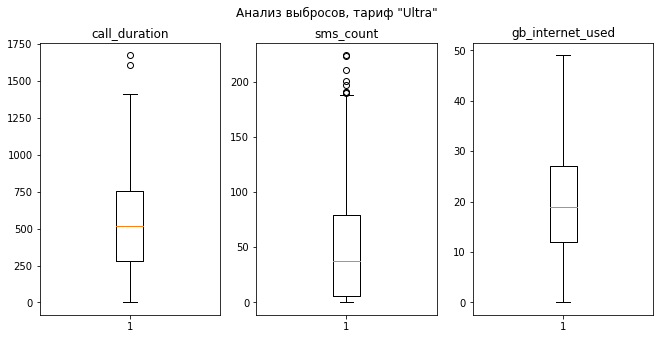

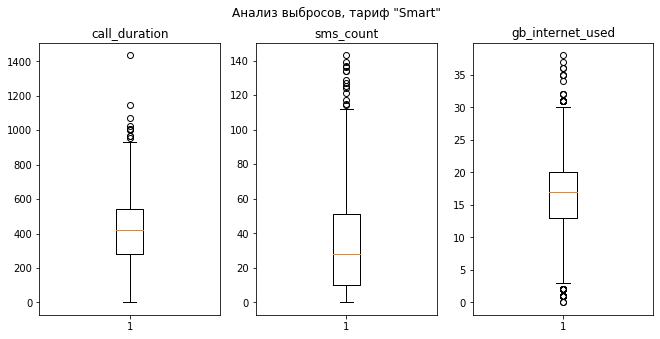

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

ultra_tariff_data = monthly_report.query('tariff == "ultra"')
stat_ultra = ultra_tariff_data.describe()

def outpoint(data, column, type):
    if type == 'high':
        point = data.loc['75%', column] + 1.5 * (data.loc['75%',column] - data.loc['25%', column])
        return point
    elif type == 'low':
        point = data.loc['25%', column] - 1.5 * (data.loc['75%',column] - data.loc['25%', column])
        return point

high_call = outpoint(stat_ultra, 'call_duration', "high")
low_call = outpoint(stat_ultra, 'call_duration', "low")

high_sms = outpoint(stat_ultra, 'sms_count', "high")
low_sms = outpoint(stat_ultra, 'sms_count', "low")

high_internet = outpoint(stat_ultra, 'gb_internet_used', "high")
low_internet = outpoint(stat_ultra, 'gb_internet_used', "low")

high_revenue = outpoint(stat_ultra, 'revenue', "high")
low_revenue = outpoint(stat_ultra, 'revenue', "low")

smart_tariff_data = monthly_report.query('tariff == "smart"')
stat_smart = smart_tariff_data.describe()

high_call_smart = outpoint(stat_smart, 'call_duration', "high")
low_call_smart = outpoint(stat_smart, 'call_duration', "low")

high_sms_smart = outpoint(stat_smart, 'sms_count', "high")
low_sms_smart = outpoint(stat_smart, 'sms_count', "low")

high_internet_smart = outpoint(stat_smart, 'gb_internet_used', "high")
low_internet_smart = outpoint(stat_smart, 'gb_internet_used', "low")

high_revenue_smart = outpoint(stat_smart, 'revenue', "high")
low_revenue_smart = outpoint(stat_smart, 'revenue', "low")

def boxplot(data,column,c,r,l):
    plt.subplot(c,r,l)
    plt.title(column)
    plt.boxplot(data[column])

box_plot_ultra = plt.figure( figsize = (11,5))
box_plot_ultra.suptitle('Анализ выбросов, тариф "Ultra"')
boxplot(ultra_tariff_data,'call_duration',1,3,1)
boxplot(ultra_tariff_data, 'sms_count',1,3,2)
boxplot(ultra_tariff_data, 'gb_internet_used',1,3,3)
plt.show()

box_plot_smart = plt.figure( figsize = (11,5))
box_plot_smart.suptitle('Анализ выбросов, тариф "Smart"')
boxplot(smart_tariff_data,'call_duration',1,3,1)
boxplot(smart_tariff_data, 'sms_count',1,3,2)
boxplot(smart_tariff_data, 'gb_internet_used',1,3,3)
plt.show()


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Очень хорошо, что подумали о выбросах заранее. 
Рекомендовал бы изначально отобразить выбросы, чтобы это было видно визуально. И после разделить большой блок кода в 8 ячейке на несколько, чтобы сделать его более читабельным.
    
С помощью какого графика обычно отбражают наличие выбросов ? 
    


</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Отлично. Функция упростила нам построение графиков. 
    
Думаю стоит также обратить внимание на количество повторяемых переменных, только по разным тарифам. Функцию **outpoint** можно попробовать сделать с возвращением двух результатов. 
    
Пример:
    
**переменная_1**, **переменная_2** = **функция**
    
</div>

### Удаление выбосов

In [77]:
good_ultra_tariff_data = ultra_tariff_data.query(' @high_call > call_duration  > @low_call &'
                                           '@high_sms > sms_count  > @low_sms &'
                                            '@high_internet > gb_internet_used > @low_internet '
                                            
                                           )

ultra_data_deleted = len(ultra_tariff_data) - len(good_ultra_tariff_data)

good_smart_tariff_data = smart_tariff_data.query(' @high_call_smart > call_duration  > @low_call_smart &'
                                           '@high_sms_smart > sms_count  > @low_sms_smart &'
                                            '@high_internet_smart > gb_internet_used > @low_internet_smart '
                                            
                                           )
smart_data_deleted = len(smart_tariff_data) - len(good_smart_tariff_data)

total_data_deleted = smart_data_deleted + ultra_data_deleted
deleted_share = total_data_deleted / len(monthly_report)



print('удалено строк всего:',total_data_deleted, 'штук' )
print('доля удаленных строчек: {:.1%}'.format(deleted_share))

good_monthly_report = pd.merge(good_smart_tariff_data, good_ultra_tariff_data, how ='outer')
good_monthly_report = good_monthly_report.sort_values(by = ['user_id', 'month']).reset_index(drop = True)
good_monthly_report.head(50)



удалено строк всего: 85 штук
доля удаленных строчек: 2.6%


,user_id,month,call_duration,calls_count,sms_count,gb_internet_used,tariff,city,revenue
0,1000,5,159,17,22,3,ultra,Краснодар,1950
1,1000,6,172,28,60,23,ultra,Краснодар,1950
2,1000,7,340,41,75,14,ultra,Краснодар,1950
3,1000,8,408,42,81,14,ultra,Краснодар,1950
4,1000,9,466,46,57,15,ultra,Краснодар,1950
5,1000,10,350,44,73,15,ultra,Краснодар,1950
6,1000,11,338,37,58,15,ultra,Краснодар,1950
7,1000,12,333,38,70,10,ultra,Краснодар,1950
8,1001,11,430,45,0,18,smart,Москва,1150
9,1001,12,414,47,0,14,smart,Москва,550


### Выводы

**На данном этапе были выполнены следующие задачи:**
- Были обнаружены в столбцах call_duration, sms_count, gb_internet_used. Так как значения данных столбцов сильно отличаются относительно тарифа, база данных была разделена на две. По каждой были определены выбросы. 
- Выявленные выбросы были удалены так, как они искажают данные. Удаление этих значений не повлияет на общую базу данных так как их удельный вес достаточно незначительный. Было удалено 85 строчек, что составляет 2,6% от общей базы данных
- Была создана новая статически хорошая база данных


Примечание: не были устранены выбросы в выручке так как таких данных очень много. Лучше отфильтровать их на стадии анализа выручки.


### Первичный исследовательский анализ данных

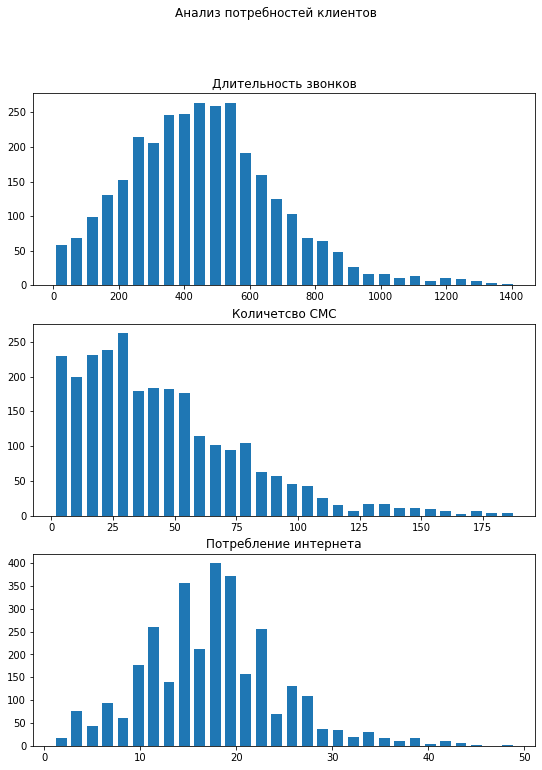

In [70]:
call_hist = good_monthly_report.query('call_duration != 0')['call_duration']
sms_hist = good_monthly_report.query('sms_count != 0')['sms_count']
internet_hist = good_monthly_report.query('gb_internet_used != 0')['gb_internet_used']

def hist_plot(data,column,c,r,l):
    plt.subplot(c,r,l)
    plt.title(column)
    plt.hist(data, bins = 30, rwidth = 0.7)

all_stat = plt.figure( figsize = (9,12))
all_stat.suptitle('Анализ потребностей клиентов')

hist_plot(call_hist,'Длительность звонков',3,1,1)
hist_plot(sms_hist,'Количетсво СМС',3,1,2)
hist_plot(internet_hist,'Потребление интернета',3,1,3)


plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Красивый вывод поведения пользователей.

</div>

### Вывод

Приведенные гистограммы указывают на то количество услуг, которые в целом необходимы клиентам. Так к примеру, необходимость следующая: 
- Количество необходимых минут - примерно от 200 до 700 минут
- Количетсво смс - до 75-85 штук
- Количество интеренета - от 10 до 25 гб


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Обрати пожалуйста внимание, что мы выполняем повторяющиеся действия при построении графиков. А это означает — автоматизация или оптимизация.
    
Почему это важно ? 
- экономия времени
- чистота кода
    
Как можно было бы автоматизировать или оптимизировать построение графиков ? 
</div>

### Визуальный анализ показателей в зависимости от тарифного плана и города

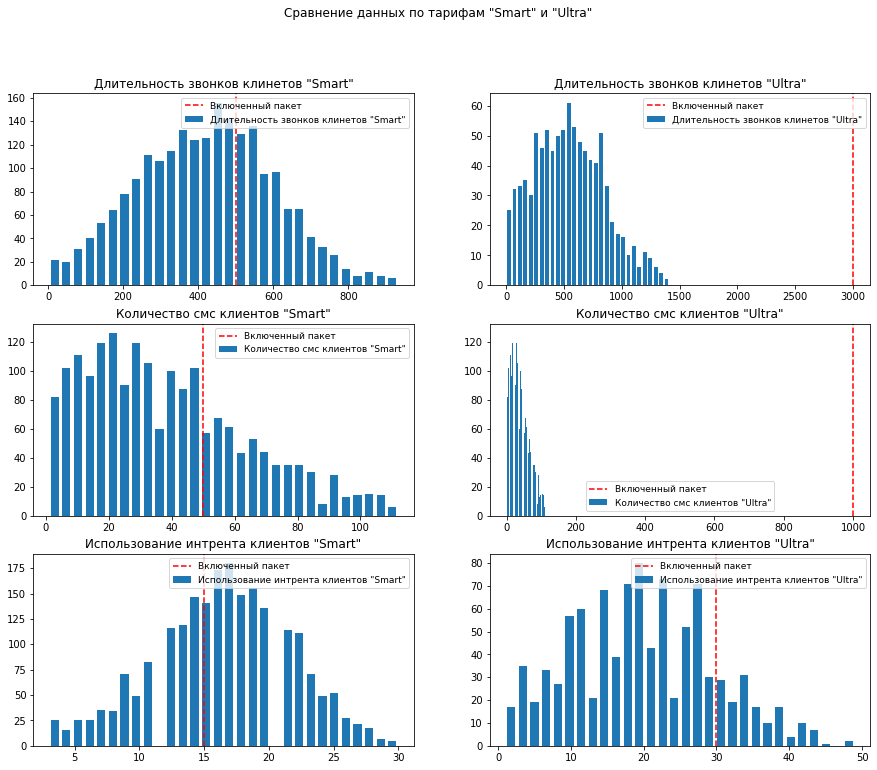

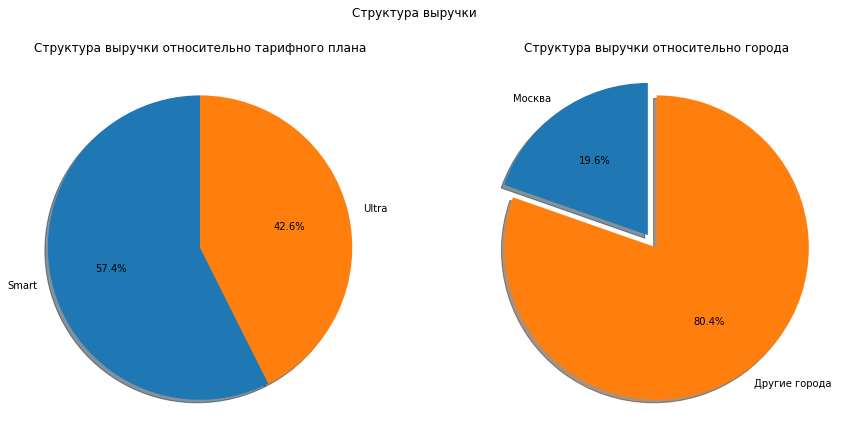

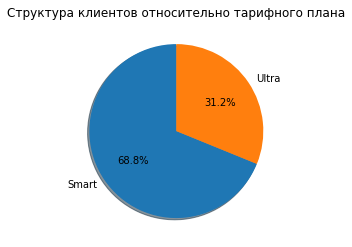

In [85]:
def hist_tariff_plot(data,column,tariff,limit,c,r,l):
    plt.subplot(c,r,l)
    plt.title(column)
    plt.hist(data,  bins = 30, rwidth = 0.7, histtype = 'bar', label = column)
    if tariff == 'Smart':
        plt.axvline(data_tariffs.loc[0, limit], c = 'r', ls = '--', label = 'Включенный пакет')
    else:
        plt.axvline(data_tariffs.loc[1, limit], c = 'r', ls = '--', label = 'Включенный пакет')
    plt.legend( prop={'size': 9})

good_smart_call = good_smart_tariff_data[good_smart_tariff_data['call_duration'] !=0]['call_duration']
good_ultra_call = good_ultra_tariff_data[good_ultra_tariff_data['call_duration'] != 0]['call_duration']
good_smart_sms = good_smart_tariff_data[good_smart_tariff_data['sms_count'] != 0]['sms_count']
good_ultra_sms = good_ultra_tariff_data[good_ultra_tariff_data['sms_count'] != 0]['sms_count']
good_smart_internet = good_smart_tariff_data[good_smart_tariff_data['gb_internet_used'] != 0]['gb_internet_used']
good_ultra_internet = good_ultra_tariff_data[good_ultra_tariff_data['gb_internet_used'] != 0]['gb_internet_used']

data_figure = plt.figure( figsize = (15,12))
data_figure.suptitle('Сравнение данных по тарифам "Smart" и "Ultra"')

hist_tariff_plot(good_smart_call, 'Длительность звонков клинетов "Smart"', 'Smart', 'minutes_included',3,2,1 )
hist_tariff_plot(good_ultra_call, 'Длительность звонков клинетов "Ultra"', 'Ultra', 'minutes_included',3,2,2 )
hist_tariff_plot(good_smart_sms, 'Количество смс клиентов "Smart"', 'Smart', 'messages_included',3,2,3 )
hist_tariff_plot(good_smart_sms, 'Количество смс клиентов "Ultra"', 'Ultra', 'messages_included',3,2,4 )
hist_tariff_plot(good_smart_internet, 'Использование интрента клиентов "Smart"', 'Smart', 'gb_per_month_included',3,2,5 )
hist_tariff_plot(good_ultra_internet, 'Использование интрента клиентов "Ultra"', 'Ultra', 'gb_per_month_included',3,2,6 )
plt.show()

clients_by_tariff = plt.figure(figsize = (15, 7))
clients_by_tariff.suptitle('Cтруктура выручки')
plt.subplot(1,2,1)
plt.title('Структура выручки относительно тарифного плана')
labels_tariffs = 'Smart', 'Ultra'
size = [good_smart_tariff_data['revenue'].sum() / good_monthly_report['revenue'].sum(), good_ultra_tariff_data['revenue'].sum() / good_monthly_report['revenue'].sum()]
plt.pie(size, labels = labels_tariffs, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.subplot(1,2,2)
plt.title('Структура выручки относительно города')
labels_city = 'Москва', 'Другие города'
size_city = [
                good_monthly_report.query('city == "Москва"')['revenue'].sum() / good_monthly_report['revenue'].sum(),
                good_monthly_report.query('city != "Москва"')['revenue'].sum() / good_monthly_report['revenue'].sum()
            ]
explode = (0.1,0)
plt.pie(size_city, explode = explode, labels = labels_city,  autopct = '%1.1f%%', shadow = True, startangle = 90 )

plt.show()

plt.title('Структура клиентов относительно тарифного плана')
labels_tariffs = 'Smart', 'Ultra'
size = [good_smart_tariff_data['revenue'].count() / good_monthly_report['revenue'].count(), good_ultra_tariff_data['revenue'].count() / good_monthly_report['revenue'].count()]
plt.pie(size, labels = labels_tariffs, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.show()


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Очень красиво. 

Если понравилась тема визуализации — рекомендую посмотреть на библиотеки **seaborn** и **plotly**.
В ячейке 10 также стоит обратить внимание на автоматизацию или оптимизацию своего кода.

</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Применение функции **hist_tariff_plot** можно было бы использовать с помощью цикла **for**

</div>



### Выводы

**На данном этапе было сделано следующее: **
- Были построены гитограмы распределения для call_duration, sms_count и gb_internet_used по каждому тарифу
- Были построены две диаграмы отражающие структуру выручки по тарифу или же по городу.

**Основные выводы**:

***длительность звонков*** отличается давольно сильно взависимости от тарифа. Так, большинство клиентов с тарифом "smart" разговаривают по телефону в основном от 220 до 600 минут в месяц , а большинство клиентов тарифа "ultra" в диапозоне от 400 до 800. Однако, стоит учесть, что несмотря на большую продолжительность звонков практически никто из клиентов премиального тарифа не заходил за лимит включенных в пакет минут. Если же говорить про само распределение, то оно имеет куполообразную форму, что ***может*** указывать на наличие нормального распределения.

***Количество сообщений***  также давольно сильно отличается взависимости от тарифа. И ,опять таки, при столь значительном превешении количества сообщений у клиентов тарифа "ultra" никто из клиентов не дошел до лимита. Распределение не очень визуально похоже на нормальное, однако, поддается логике и имеет место быть. 

***Использование интерента***. Данный показатель больше всего сходится у двух групп клиентов, правда у клиентов тарифа "ultra"  более широкий разброс значений, однако, большинство клиентов все еще попадает в полученные лимиты, хотя в отдельных случаях уже видны превышения. Немного другая ситуация с клиентами тарифа "smart". Тут половина или же даже большинство превышают доступный лимит по бесплатному интернету. Распрделение, конкретно  у клиентов тарифа "smart", куполообразное в отличии от клиентов "ultra"

***Структура выручки***. Несмотря на то, что ежемесячная плата у тарифа "ultra" больше, стандартный тариф  генерирует больше выручки. С чем это связано? Как кажется мне, это может быть связано установленными лимитами. Так к примеру,  большинство клиентов с тарифом "smart", как уже упоменалось выше, превышает лимит, что ведет к большому увеличением выручки. Если же говоротить о географической структуре выручки, то практически 20% приходится на столицу.


***примечание***. Все данные дискретные, так как оператор взымает плату за целую минуту или же гигабайт. Так, к примеру, разговор по факту длился 1 мин. 35 сек., но , как уже говорилось ранее, опертор это будет учитывать как 2 мин.



<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Прекрасные промежуточные выводы, а самое главное подкреплены полученными данными на основании исследования.

</div>

### Описательная статистика

In [72]:
def example(data, columns): 
    stat= []
    for column in columns:
        result = []
        median = data[column].median()
        mean = data[column].mean()
        var = np.var(data[column], ddof=1)
        std = np.std(data[column], ddof=1)
        result.append(median)
        result.append(mean)
        result.append(var)
        result.append(std)
        stat.append(result)
    return stat

list_columns = ['call_duration','sms_count','gb_internet_used', 'revenue']

stat_list = example(good_smart_tariff_data, list_columns)
stat_data = pd.DataFrame(stat_list, index =['call_duration','sms_count','gb_internet_used', 'revenue'], columns = ['median', 'mean', 'var','std'])
smart_stat_data = stat_data.T


ultra_stat_list = example(good_ultra_tariff_data, list_columns)
ultra_stat_data = pd.DataFrame(ultra_stat_list, index =['call_duration','sms_count','gb_internet_used', 'revenue'], columns = ['median', 'mean', 'var','std'])
ultra_stat_data = ultra_stat_data.T

print('----------------------------Тариф "Smart"-----------------------')
print()
print(smart_stat_data)
print()
print('----------------------------Тариф "Ultra"-----------------------')
print()
print(ultra_stat_data)



----------------------------Тариф "Smart"-----------------------

        call_duration   sms_count  gb_internet_used        revenue
median     423.000000   28.000000         17.000000    1026.500000
mean       418.951718   33.161560         16.402507    1261.286444
var      32679.363204  738.807142         27.731550  554521.847777
std        180.774343   27.181007          5.266075     744.662237

----------------------------Тариф "Ultra"-----------------------

        call_duration    sms_count  gb_internet_used        revenue
median     518.000000    38.000000         19.000000    1950.000000
mean       525.661538    48.139487         19.436923    2067.692308
var      98077.875059  2109.658141         96.353050  138713.868267
std        313.173874    45.931015          9.815959     372.443107


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Интересный и красивый вывод полученных статистических значений.

</div>

### Выводы

На данном этапе были подсчитана основные показатели статистики: медиана, среднее значание, вариация, стандартное отклонение. данные показатели были рассчитаны для основных метрик проекта: длительности звонка, количества смс, использованного интернета в гигабайтах и выручки.

**Основные выводы**
- Подтвердилось то, что два разных тарифа имеют давольно большие отличия 
- В целом имеется давольно большое стандартное отклонение, что ***может*** указывать на неоднородность данных
- Выручка по тарифу "ultra" более стабильная, это может быть связано в основном с тем, что большая часть этой выручки формируется за счет высокой ежемесячной платы, плюс к этому, лимиты установлены настолько высоко, что большая часть пользователей даже не успевает израсходовать включенный пакет, что не приносит доп. дохода, который мог внести большую валатильность данных. 

***примечание***. Предполгается, что те данные - выборка ( по условию задачи)

### Проверка на нормальность распределения

------------------------Итоги теста------------------------
Распредление выручки от клиентво тарифа "ulra" ненормальное
Распредление выручки от клиентво тарифа "smart" ненормальное


-------------------Итоги теста-------------------
Распредление выручки в городе Москва ненормальное
Распредление выручки  в других городах ненормальное


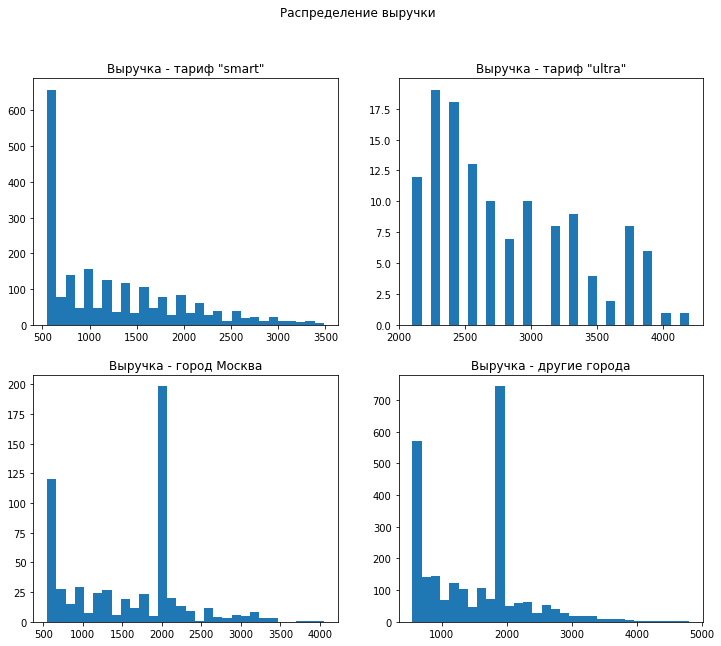

In [73]:
from scipy import stats as st

# проверка на наличие нормального распределения в данных по выручке, генерируемой каждым тарифом 

alpha = 0.05
ultra_revenue = good_monthly_report.query('tariff == "ultra" &'
                                          '4450 > revenue > @low_revenue'
                                          )
smart_revenue = good_monthly_report.query('tariff == "smart" &'
                                         '@high_revenue_smart  > revenue > @low_revenue_smart'
                                         )
ultra_revenue = ultra_revenue['revenue']
smart_revenue = smart_revenue['revenue']


print('------------------------Итоги теста------------------------')
count = 0
for data in [ultra_revenue, smart_revenue]:
    count += 1
    k, p = st.stats.normaltest(data)
    if p > alpha:
        if count == 1:
            print('Распредление выручки от клиентво тарифа "ulra" нормальное')
        else: 
            print('Распредление выручки от клиентво тарифа "smart" нормальное')
    else:
        if count == 1:
            print('Распредление выручки от клиентво тарифа "ulra" ненормальное')
        else: 
            print('Распредление выручки от клиентво тарифа "smart" ненормальное')
            
print()
print()

# проверка на наличие нормального распределения в данных по выручке, генерируемой в рызных городах

moscow_revenue = good_monthly_report.query('city == "Москва"')['revenue']
Other_city_revenue = good_monthly_report.query('city != "Москва"')['revenue']

print('-------------------Итоги теста-------------------')
count = 0
for data in [moscow_revenue, Other_city_revenue]:
    count += 1
    k, p = st.stats.normaltest(data)
    if p > alpha:
        if count == 1:
            print('Распредление выручки в городе Москва нормальное')
        else: 
            print('Распредление выручки в других городах нормальное')
    else:
        if count == 1:
            print('Распредление выручки в городе Москва ненормальное')
        else: 
            print('Распредление выручки  в других городах ненормальное')
    
distr_revenue = plt.figure( figsize = (12,10))
distr_revenue.suptitle('Распределение выручки')

plt.subplot(2,2,1)
plt.hist(smart_revenue, bins = 30)
plt.title('Выручка - тариф "smart"')

plt.subplot(2,2,2)
plt.hist(ultra_revenue, bins = 30)
plt.title('Выручка - тариф "ultra"')

plt.subplot(2,2,3)
plt.hist(moscow_revenue, bins = 30 )
plt.title('Выручка - город Москва')

plt.subplot(2,2,4)
plt.hist(Other_city_revenue, bins = 30 )
plt.title('Выручка - другие города')

plt.show()

### Выводы

На данном этапе была проведена проверка наличия нормального распределения выручки у клиентов разных тарифов и раных городов.
Тест указал на то, что признаков нормального распредления нет, это также видно и на предоставленных гистограммах. Однако, это давольно ожидаемо, основная причина - наличие ежемесячной платы и включенных пакетах.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Отлично, что подумали над статистической проверкой нормальности данных. 
Хотел бы обратить твоё внимание, исходя из моего опыта — нормальное распределение можно встретить очень редко. Поэтому работать будем с тем что есть :)
</div>

In [80]:

alpha = .05 

# ----------------------------------------------------Тест Стьюдента-----------------------------------------------------
print('Итоги теста Стьюдента на равенство средней выручки от двух тарифов:')
print()

results = st.ttest_ind(
    ultra_revenue, 
    smart_revenue)


print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()


# ----------------------------------------------------Тест  Манна-Уитни-----------------------------------------------------
print('Итоги теста Манна-Уитни на равенство средней выручки от двух тарифов:')
print()

s, p_value = st.mannwhitneyu(ultra_revenue,smart_revenue, alternative = 'two-sided' )

print('p-значение:', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
print('Средняя выручка тарифа "smart": {:.1f}'.format(smart_revenue.mean()))
print('Средняя выручка тарифа "ultra": {:.1f}'.format(ultra_revenue.mean()))



Итоги теста Стьюдента на равенство средней выручки от двух тарифов:

p-значение: 2.255741172485192e-114
Отвергаем нулевую гипотезу

Итоги теста Манна-Уитни на равенство средней выручки от двух тарифов:

p-значение: 3.704352700455885e-64
Отвергаем нулевую гипотезу

Средняя выручка тарифа "smart": 1245.5
Средняя выручка тарифа "ultra": 2803.1


### Вывод

**Было сделано следующее**:
- Был проведен тест Стьюдента
- Был проведен тест Стьюдента тест  Манна-Уитни

1.Нулевая гипотеза -  средния выручка тарифного плана "Smart" ***не отличается*** от средней выручки тарифа "Ultra"  
2.Альтернативная гипотеза - средние выручки ***отличаются*** друг друга

**Итог теста**- нулевая гипотеза отвергнута. Можно ***предположить***, что средние ***отличаются*** ( в разделе "описательная статистика" данный тезис подтверждается.)

***Примечение***. По-хорошему, так как в данных отсутсвтует нормальное распределение, немного не корректно, наверное, использовать данный тест. Необходим другой (?), но так как при прохождении соответствующего модуля нам был представлен для обучения только этот метод, использую его, тажке наставник говорил, что использовать его можно. Однако, так как распредление, как указывалось мною выше, ненормальное, можно провести еще один тест, который больше подходит для двух выборок без нормального распреления - Тест  Манна-Уитни.



<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Расскажи пожалуйста почему выбрал именно этот метод проверки?

Очень важно понимать, что проверяемые нами гипотезы носят двусторонний характер. То есть мы не можем однознозначно утверждать больше или меньше один из тарифов.
    
Поэтому важно использовать корректные формулировки гипотез. В нашем случае подходит следующая формулировка — «отличается/не отличается выручка тарифов».
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Гипотезы сформулированы верно.
</div>

In [75]:
alpha = .05 
# ----------------------------------------------------Тест Стьюдента-----------------------------------------------------
print('Итоги теста Стьюдента на равенство средней выручки в разных городах:')
print()

results = st.ttest_ind(
    moscow_revenue, 
    Other_city_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу ")
print()    


# ----------------------------------------------------Тест  Манна-Уитни-----------------------------------------------------
print('Итоги теста Манна-Уитни на равенство средней выручки в разных городах:')
print()

s_city, p_value_city = st.mannwhitneyu(moscow_revenue,Other_city_revenue, alternative = 'two-sided' )

print('p-значение:', p_value_city)
if (p_value_city < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


print()
print('Средняя выручка в Москве: {:.1f}'.format(moscow_revenue.mean()))
print('Средняя выручка в других городах: {:.1f}'.format(Other_city_revenue.mean()))

Итоги теста Стьюдента на равенство средней выручки в разных городах:

p-значение: 0.2875961237641404
Не получилось отвергнуть нулевую гипотезу 

Итоги теста Манна-Уитни на равенство средней выручки в разных городах:

p-значение: 0.25967765645014496
Не получилось отвергнуть нулевую гипотезу

Средняя выручка в Москве: 1541.8
Средняя выручка в других городах: 1505.6


###  Вывод

**Было сделано следующее**:
- Был проведен тест Стьюдента
- Был проведен тест Стьюдента тест  Манна-Уитни

1.Нулевая гипотеза -  средния выручка в городе Москва ***не отличается*** от средней выручки в других городах    
2.Альтернативная гипотеза - средние выручки ***отличаются*** друг друга

**Итог теста**- нулевая гипотеза не отвергнута. Можно ***предположить***, что средние ***не отличаются***. Как мы можем видеть, фактические средние выборки достаточно близки друг к другу 

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Предлагаю поправить формулировки гипотез, исходя из комментариев выше.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Гипотезы сформулированы верно.
</div>

### Общий вывод по проекту

**Задачи выполненные в течении проекта:**
- Были прочтены и проверены исходные файлы
- Была создана общая таблица с информацией (длительность звока, кол-во смс, кол-во использованного интернета) для каждого уникального клиента по месяцам.
- Данные были проверены на предмет выбросов. Выбросы были удалены 
- Были построены и проанализированные гистограмы и диаграммы основных метрик
- Была проведена описательная статистика
- Данные по выручке по каждому тарифу и городу были проверены на наличие нормального распредления
- Была проверена гипотеза равенства двух средних велечин ( выручка от тарифа "smart" и "ultra", а также выручка в городе Москва и других городах)


**Вывод**
Компании выгоднее сделать упор на тарифный план "smart, на это есть несколько причин:
- Тариф "smart" удобный как для клиентов, потому что имеют более низкую стоимость обслуживать и покрывает большую (основную) часть потребностей, так и для компании, так как позволяет создавать дополнительный доход. 
- Пакет плана "ultra" имеет неоправдано большие лимиты по услугам, большинству абонентов столько не нужно. 
- Тариф 'ultra' намного менее популярнее, чем тариф 'smart' ( клиентов с тарифом "Smart" в два раза больше)

Может быть и иной ход: 
- замена тарифного плана "ultra" на дополнительные пакеты услуг к тарифу "smart". Данный ход сможет снизить вариативность дохода.

Также отвечая на вопрос **" Какой тариф приносит больше денег?"** - основываясь на проделанной работе - **тариф "smart"**

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Если посмотреть на выручку в целом, что было сделано на круговых диаграммах, в целом мы видим что дельта тарифа смарт больше всего на 6% чем у тарифа ультра. На мой взгляд разница не совсем существенная между тарифами. С помощью каких выявленных фактов, мы можем утверждать, что тариф смарт приносит больше выручки в компанию? :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Предлагаю также улучшить оформление за счет разделения кода на несколько ячеек или оптимизировать/автоматизировать, чтобы сделать его более чистым.
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Здорово, что мы сформировали конкретную рекомендацию для коллег из смежных департаментов, это и есть профессиональный уровень :)
    
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа «markdown» там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов в новых работах и не сбавляй темпы своего обучения! :)
    
</div>